In [27]:
#ABALONE VERİ SETİ İLE ÖRNEK UYGULAMA

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import datasets

In [73]:
data = pd.read_csv("/Users/mustafacitak/Desktop/Python/DL_Calisma/Abalone.csv")

print(data.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [74]:
#Cinsiyet özelliğini sayısallaştıralım.
data["Sex"] = data["Sex"].map({"M": 0, "F": 1, "I": 2})

In [75]:
#sınıf özniteliğinin ayrılması
X = data.drop("Rings", axis=1)
y = data["Rings"]

In [76]:
#Verinin eğitim ve test biçimide ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [78]:
#Keras regresyon modeli

# Model oluşturma
model = Sequential()
model.add(Dense(256, input_dim=8, kernel_initializer="normal", activation="relu"))
model.add(Dense(256, kernel_initializer="normal", activation="relu"))
model.add(Dense(1, kernel_initializer="normal"))

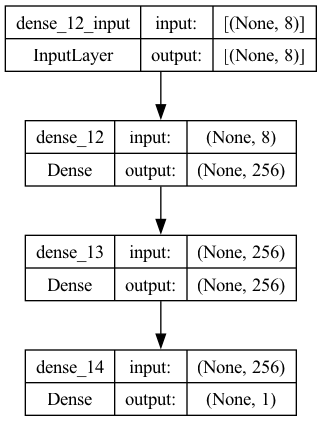

In [79]:
# Model grafiğinin kaydedilmesi
tf.keras.utils.plot_model(model, "Abalone-model.png", show_shapes=True, show_layer_names=True)

In [86]:
# Modelin derlenmesi
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [91]:
# Modelin egitilmesi
history = model.fit(X_train, y_train, epochs=50, verbose=3, validation_split=0.3)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


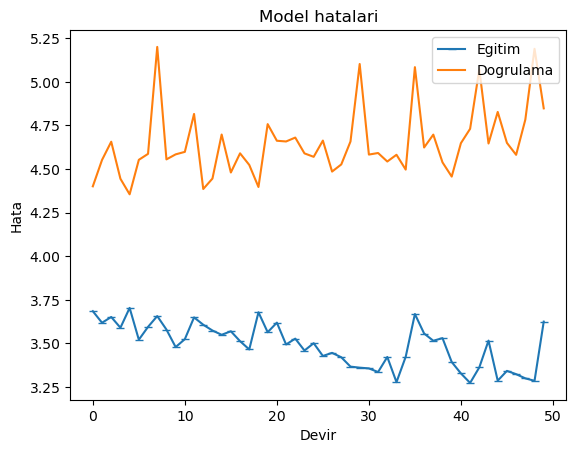

In [92]:
# Egitim ve dogrulama verisi için hata grafigi
plt.plot(history.history["loss"], "_-")
plt.plot(history.history["val_loss"])
plt.title("Model hatalari")
plt.ylabel("Hata")
plt.xlabel("Devir")
plt.legend(["Egitim", "Dogrulama"], loc="upper right")
plt.show()

In [93]:
# Test verisi ile performans ölçümü
from sklearn.metrics import mean_squared_error
öngörü = model.predict(X_test)
print("\n Performans (MSE) :", np.sqrt(mean_squared_error(y_test, öngörü)))

27/27 [==============================] - 0s 401us/step

 Performans (MSE) : 2.2567028285472124


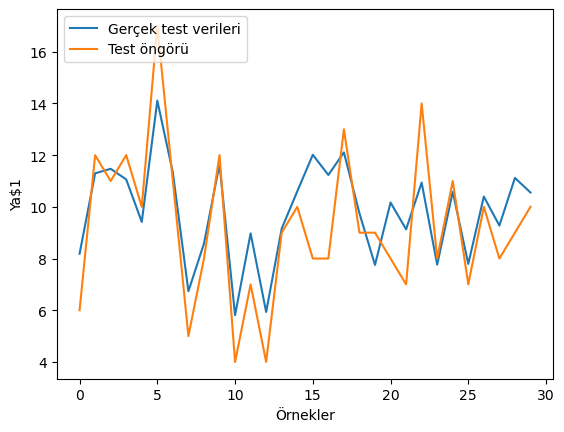

In [84]:
# Ilk 30 gözlem için öngörü ve gercek test degerleri
plt.plot(öngörü[0:30])
plt.plot(y_test[:30].ravel())
plt.ylabel("Ya$1")
plt.xlabel("Örnekler")
plt.legend(["Gerçek test verileri", "Test öngörü"], loc="upper left")
plt.show()